In [ ]:
!pip install -q kaggle

In [ ]:
# Upload api kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizkyfahreza","key":"5c5deb65fe64a44af1c87afe7da7b566"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           9405        167  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           23MB  2024-06-20 11:05:17            272        404  1.0              
zeesolver/data-eng-salary-2024                                       Data Developer Salary in 2024💰                   108KB  2024-06-10 07:33:22           1527         25  1.0              
sahilprajapati143/retail-analysis-large-dataset   

In [ ]:
!kaggle datasets download -d 'fuadkahfi/dataset-tanah'

Dataset URL: https://www.kaggle.com/datasets/fuadkahfi/dataset-tanah
License(s): unknown
100% 224M/224M [00:02<00:00, 98.2MB/s]
100% 224M/224M [00:02<00:00, 91.7MB/s]


In [ ]:
import zipfile

In [ ]:
dataset_zip = zipfile.ZipFile('dataset-tanah.zip', 'r')

dataset_zip.extractall()

dataset_zip.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os

from tensorflow.keras.applications import Xception

In [ ]:
# Direktori dataset setelah ekstraksi
base_dir = 'Tanah'

# Pengaturan untuk ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1  # Membagi 10% data untuk validasi
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Ukuran gambar yang akan diubah
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 792 images belonging to 8 classes.
Found 88 images belonging to 8 classes.


In [ ]:
# Load Xception base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]

In [ ]:
# freeze or not the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# # Fine tuning
# # pilih salah satu
# # layer awal - 100
# for layer in base_model.layers[:100]:
#     layer.trainable = False

# # dari layer 100 hingga akhir
# for layer in base_model.layers[100:]:
#     layer.trainable = True

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
    ],name="CNN_Model_for_Soil_Type_Classification_with_Transfer_Learning_from_Xception")

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "CNN_Model_for_Soil_Type_Classification_with_Transfer_Learning_from_Xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 21914672 (83.60 MB)
Trainable params: 10531

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.00001)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Tambah jumlah epoch
    # callbacks=[reduce_lr]
)


Epoch 1/50
24/24 [==============================] - 19s 479ms/step - loss: 1.5877 - accuracy: 0.4355 - val_loss: 1.0113 - val_accuracy: 0.6875
Epoch 2/50
24/24 [==============================] - 12s 490ms/step - loss: 1.0433 - accuracy: 0.6315 - val_loss: 0.8140 - val_accuracy: 0.7188
Epoch 3/50
24/24 [==============================] - 10s 415ms/step - loss: 0.9311 - accuracy: 0.6789 - val_loss: 0.7093 - val_accuracy: 0.7031
Epoch 4/50
24/24 [==============================] - 9s 387ms/step - loss: 0.8192 - accuracy: 0.7066 - val_loss: 0.7584 - val_accuracy: 0.7031
Epoch 5/50
24/24 [==============================] - 10s 408ms/step - loss: 0.8078 - accuracy: 0.7289 - val_loss: 0.6304 - val_accuracy: 0.8125
Epoch 6/50
24/24 [==============================] - 10s 422ms/step - loss: 0.7219 - accuracy: 0.7539 - val_loss: 0.6051 - val_accuracy: 0.7812
Epoch 7/50
24/24 [==============================] - 10s 421ms/step - loss: 0.7319 - accuracy: 0.7487 - val_loss: 0.5366 - val_accuracy: 0.8281


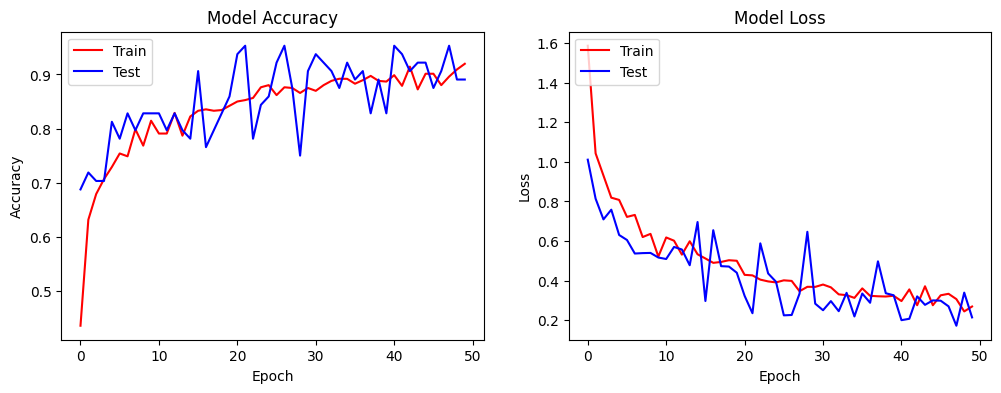

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Mengatur ukuran figure
plt.figure(figsize=(12, 4))

# Plot akurasi pelatihan dan validasi
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Menampilkan plot
plt.show()


In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')


3/3 [==============================] - 1s 303ms/step - loss: 0.2151 - accuracy: 0.9545
Validation accuracy: 95.45%


In [ ]:
# Membuat prediksi
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Muat dan proses gambar
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediksi gambar
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[class_idx]

# Contoh prediksi
img_test = files.upload()   # Ganti dengan path gambar yang ingin diprediksi
for filename in img_test.keys():
  predicted_class = predict_image(filename)
  print(f'The predicted class is: {predicted_class}')


Saving test_pasir.jpeg to test_pasir.jpeg
1/1 [==============================] - 2s 2s/step
The predicted class is: 02-Andosol


Export Model

In [ ]:
IMAGE_PROCESSING_TANAH_MODEL = 'image_processing_tanah_2'

In [ ]:
# Save ke .h5
model.save('image_processing_tanah_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tf.saved_model.save(model, IMAGE_PROCESSING_TANAH_MODEL)

Convert to tf.lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(IMAGE_PROCESSING_TANAH_MODEL)

In [ ]:
# Select mode of optimization
mode = ""

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(IMAGE_PROCESSING_TANAH_MODEL)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'image_processing_tanah_3.tflite'
with open (tflite_model_file, 'wb') as f:
  f.write(tflite_model)

Menambahkan Metadata

In [ ]:
# Install TensorFlow Lite Support Library
!pip install tflite-support


In [ ]:
# Import necessary libraries
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

# Lokasi model TFLite yang akan ditambahkan metadata
model_path = "image_processing_tanah_3.tflite"
# Lokasi penyimpanan model TFLite dengan metadata
model_with_metadata_path = "image_processing_tanah_3_with_metadata.tflite"

# Tentukan input normalization sesuai dengan rescaling 1./255
input_norm_mean = 127.5
input_norm_std = 127.5

# Path ke file label
label_file_paths = ["label_tanah.txt"]

# Buat metadata
writer = image_classifier.MetadataWriter.create_for_inference(
    writer_utils.load_file(model_path),
    input_norm_mean,
    input_norm_std,
    label_file_paths
)
writer_utils.save_file(writer.populate(), model_with_metadata_path)

In [ ]:
files.download(model_with_metadata_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>